In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from google.colab import drive
import io
import itertools

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flood Prediction Blr Knn Svc Dtc Python/FloodPredictionBlrKnnSvcDtc_Python.csv')
df

,station,year,annualRainfall,stationIndex,flood
0,Dhaka,2011,1776,1,1
1,Dhaka,2012,1329,1,0
2,Dhaka,2013,1556,1,0
3,Dhaka,2014,1399,1,0
4,Dhaka,2015,2166,1,1
5,Dhaka,2016,1365,1,0
6,Barishal,2011,1909,2,1
7,Barishal,2012,1617,2,0
8,Barishal,2013,2321,2,1
9,Barishal,2014,1454,2,0


In [12]:
df[df.stationIndex == 2].head()

,station,year,annualRainfall,stationIndex,flood
6,Barishal,2011,1909,2,1
7,Barishal,2012,1617,2,0
8,Barishal,2013,2321,2,1
9,Barishal,2014,1454,2,0
10,Barishal,2015,2434,2,1


In [13]:
df[df.stationIndex == 3].head()

,station,year,annualRainfall,stationIndex,flood
12,Sylhet,2011,3101,3,1
13,Sylhet,2012,4610,3,1
14,Sylhet,2013,3825,3,1
15,Sylhet,2014,3372,3,0
16,Sylhet,2015,4521,3,1


In [14]:
df[df.stationIndex == 4].head()

,station,year,annualRainfall,stationIndex,flood
18,Rajshahi,2011,1475,4,1
19,Rajshahi,2012,1164,4,0
20,Rajshahi,2013,1248,4,0
21,Rajshahi,2014,1188,4,0
22,Rajshahi,2015,1421,4,0


In [15]:
dfYes=df[df.flood==1]
dfNo=df[df.flood==0]

In [16]:
dfYes

,station,year,annualRainfall,stationIndex,flood
0,Dhaka,2011,1776,1,1
4,Dhaka,2015,2166,1,1
6,Barishal,2011,1909,2,1
8,Barishal,2013,2321,2,1
10,Barishal,2015,2434,2,1
12,Sylhet,2011,3101,3,1
13,Sylhet,2012,4610,3,1
14,Sylhet,2013,3825,3,1
16,Sylhet,2015,4521,3,1
18,Rajshahi,2011,1475,4,1


In [17]:
dfNo

,station,year,annualRainfall,stationIndex,flood
1,Dhaka,2012,1329,1,0
2,Dhaka,2013,1556,1,0
3,Dhaka,2014,1399,1,0
5,Dhaka,2016,1365,1,0
7,Barishal,2012,1617,2,0
9,Barishal,2014,1454,2,0
11,Barishal,2016,2351,2,0
15,Sylhet,2014,3372,3,0
17,Sylhet,2016,4296,3,0
19,Rajshahi,2012,1164,4,0


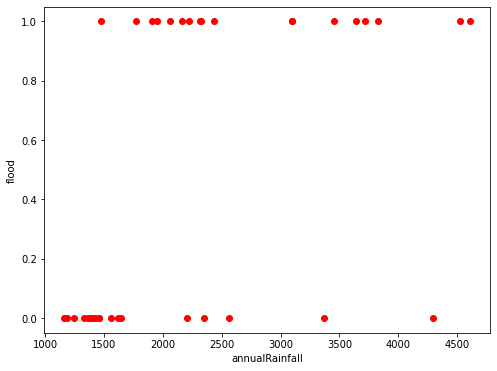

In [18]:
plt.figure(figsize = [8, 6])
plt.xlabel('annualRainfall')
plt.ylabel('flood')
plt.scatter(df['annualRainfall'], df['flood'], color = 'red')

In [19]:
x = df.drop(['station','stationIndex','year','flood'], axis = 'columns')
y = df.flood

In [20]:
x

,annualRainfall
0,1776
1,1329
2,1556
3,1399
4,2166
5,1365
6,1909
7,1617
8,2321
9,1454


In [21]:
y

0     1
1     0
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    0
27    1
28    1
29    0
30    1
31    0
32    1
33    0
34    1
35    1
Name: flood, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
len(x_train)

28

In [23]:
len(x_test)

8

KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.score(x_test,y_test)

0.875

In [26]:
knn.predict([[2520]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

SVC

In [27]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [28]:
svc.score(x_test,y_test)

0.875

In [29]:
svc.predict([[1849]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

DTC

In [30]:
dtc = tree.DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [31]:
dtc.score(x_test,y_test)

0.875

In [32]:
dtc.predict([[2395]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

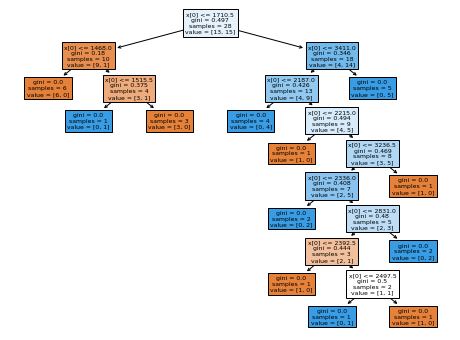

In [33]:
plt.figure(figsize = [8, 6])
plot_tree(dtc, filled=True)
# plt.title("Decision tree trained on all the iris features")
plt.show()

In [34]:
dtc.classes_

array([0, 1])

BLR

In [35]:
x = df.drop(['station','stationIndex','year','flood'], axis = 'columns')
y = df.flood

In [36]:
x

,annualRainfall
0,1776
1,1329
2,1556
3,1399
4,2166
5,1365
6,1909
7,1617
8,2321
9,1454


In [37]:
y

0     1
1     0
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    0
27    1
28    1
29    0
30    1
31    0
32    1
33    0
34    1
35    1
Name: flood, dtype: int64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
blr = LogisticRegression()
blr.fit(x_train,y_train)

LogisticRegression()

In [40]:
blr.score(x_test,y_test)

0.75

<AxesSubplot:xlabel='annualRainfall', ylabel='flood'>

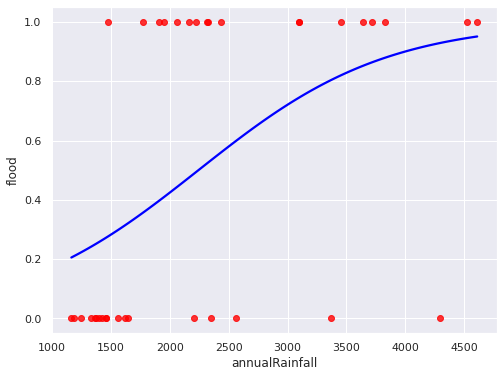

In [41]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x=df['annualRainfall'], y=df['flood'], data=df, logistic=True, ci=None, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [42]:
blr.predict([[3400]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])